In [115]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats

from scipy.stats import shapiro, levene, mannwhitneyu
from scipy.stats import ttest_ind, norm, chi2_contingency

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

Ejercicio
•	Fase 1: Exploración y Limpieza
1.	Exploración Inicial:
	Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
	Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
	Une los dos conjuntos de datos de la forma más eficiente.

In [116]:
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [118]:
# cargamos todos los conjuntos de datos: En principio los he cargado de esta manera pero considero que es mejor utilizar esta columna indice para realizar la unión de los datos.
dfa = pd.read_csv("Customer Flight Activity.csv", index_col = 0)



In [119]:
dlh = pd.read_csv("Customer Loyalty History.csv", index_col = 0)

In [120]:
# Cargamos dfa con indice Loyalty Number como numero de identificación del cliente, visualizamos las primeras filas:
dfa = pd.read_csv("Customer Flight Activity.csv", index_col = "Loyalty Number")
dfa.head(2)


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0


In [121]:
# Cargamos dlh con indice Loyalty Number como numero de identificación del cliente, visualizamos las primeras filas:
dlh = pd.read_csv("Customer Loyalty History.csv", index_col = "Loyalty Number")
dlh.head(2)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


Revisamos el numero de filas y columnas para cada conjunto de datos y el detalle de sus columnas

In [122]:
dfa.shape

(405624, 9)

In [123]:
dlh.shape

(16737, 15)

In [124]:
dlh.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [125]:
dfa.columns

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [126]:
# Fusionar los DataFrames mediante el índice 'Loyalty Number'
df= pd.merge(dlh, dfa, left_index=True, right_index=True)
df.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [127]:
df.reset_index(inplace=True)
df

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,2,2,2,4,1320,132.0,0,0
2,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2018,10,6,4,10,3110,311.0,385,31
3,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,4,4,0,4,924,92.0,0,0
4,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,5,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN,2018,7,15,0,15,1995,199.0,0,0
405620,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN,2018,9,0,0,0,0,0.0,0,0
405621,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN,2018,10,6,0,6,708,70.0,0,0
405622,999986,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN,2018,11,11,4,15,2040,204.0,0,0


In [128]:
df.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [129]:
# realizamos un analisis inicial de todo el dataframe
df.head(3)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,2,2,2,4,1320,132.0,0,0
2,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2018,10,6,4,10,3110,311.0,385,31


In [130]:
# una vez que tengamos nuestro DataFrame preparado con todas las columnas que queremos vamos a crear una función que no haga una exploración inicial del conjunto de datos
def eda(dataframe):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas

    Parámetros:
    - dataframe (DataFrame): El DataFrame que se va a explorar.
    
    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    
    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    print(f"el numero de filas y columnas del df son : {df.shape}")
    print("\n ..................... \n")
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    # generamos un DataFrame para tipos de datos
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))

    
    # principales estadisticos de todas las columnas
    print("\n ..................... \n")

    # estadisticos columnas numericas
    print(f"estadisticos columnas numericas")
    display(df.describe().T)
    print("\n ..................... \n")


    # estadisticos columnas categoricas
    print(f"estadisticos columnas categoricas")
    display(df.describe(include = "O").T)
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    


In [131]:
eda(df)

Los duplicados que tenemos en el conjunto de datos son: 1864

 ..................... 

el numero de filas y columnas del df son : (405624, 25)

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.312112
Cancellation Year,87.657535
Cancellation Month,87.657535



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object



 ..................... 

estadisticos columnas numericas


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Salary,302952.0,79268.825953,34992.133508,-58486.00,59262.00,73479.00,88612.00,407228.00
CLV,405624.0,7991.976226,6863.663857,1898.01,3985.32,5776.34,8936.82,83325.38
Enrollment Year,405624.0,2015.252529,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,405624.0,6.668008,3.399766,1.00,4.00,7.00,10.00,12.00
Cancellation Year,50064.0,2016.499521,1.384336,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,50064.0,6.966443,3.448300,1.00,4.00,7.00,10.00,12.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00



 ..................... 

estadisticos columnas categoricas


,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene las siguientes valore únicos:


,Country
Canada,405624


La columna PROVINCE tiene las siguientes valore únicos:


,Province
Ontario,130896
British Columbia,106848
Quebec,79968
Alberta,23400
Manitoba,15984


La columna CITY tiene las siguientes valore únicos:


,City
Toronto,81096
Vancouver,62520
Montreal,49920
Winnipeg,15984
Whistler,14040


La columna POSTAL CODE tiene las siguientes valore únicos:


,Postal Code
V6E 3D9,21984
V5R 1W3,16608
V6T 1Y8,14040
V6E 3Z3,13200
M2M 7K8,12936


La columna GENDER tiene las siguientes valore únicos:


,Gender
Female,203640
Male,201984


La columna EDUCATION tiene las siguientes valore únicos:


,Education
Bachelor,253752
College,102672
High School or Below,19008
Doctor,17856
Master,12336


La columna MARITAL STATUS tiene las siguientes valore únicos:


,Marital Status
Married,235800
Single,108648
Divorced,61176


La columna LOYALTY CARD tiene las siguientes valore únicos:


,Loyalty Card
Star,184224
Nova,137568
Aurora,83832


La columna ENROLLMENT TYPE tiene las siguientes valore únicos:


,Enrollment Type
Standard,382200
2018 Promotion,23424


In [132]:
df_sorted = df.sort_values(by='Salary')

df_sorted['Salary']


23074    -58486.0
23085    -58486.0
23084    -58486.0
23083    -58486.0
23082    -58486.0
           ...   
405595        NaN
405596        NaN
405597        NaN
405598        NaN
405599        NaN
Name: Salary, Length: 405624, dtype: float64

En principio la columna country es el mismo valor para todos por lo que no considero necesaria esa columna
Si consideramos que los datos nulos se consideran altos a partir de un  5-10%. En la columna salary tenemos un 11.8% de valores negativos y 25.31% de nulos. Entiendo que esta columna es importante para el analisis por la que revisaremos con mas detalle para determinar que hacer con estos negativos.Las columnas
cancellation_year y cancellation_month presentan "ambas" un 87.65% de nulos. La columna year años 2017/2018

# Cleaning

In [133]:
# vamos a cambiar las columnas, utilizando una listc. itero for col in df.columns: Itera sobre cada columna en el DataFrame df.

# col.lower(): Convierte el nombre de la columna a minúsculas.
# .replace(" ", "_"): Reemplaza cualquier espacio en blanco en el nombre de la columna con un guion bajo "_".
columnas = [col.lower().replace(" ", "_") for col in df.columns]
df.columns = columnas
df.head(2)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,2,2,2,4,1320,132.0,0,0


In [134]:
def limpiar_columna(columna):
    """
    Convierte los valores de una columna a minúsculas y reemplaza los espacios con '_'.
    
    Parámetros:
    - columna: La columna que se desea limpiar.
    
    Retorna:
    - La columna limpia.
    """
    # Convertir a minúsculas y reemplazar espacios con '_'
    columna = columna.str.lower().str.replace(' ', '_')
    return columna



In [136]:
# Lista de columnas que deseas limpiar
columnas_por_cambiar = ['province', 'city', 'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card', "enrollment_type"]



In [137]:
# Aplicar la función a las columnas seleccionadas
df[columnas_por_cambiar] = df[columnas_por_cambiar].apply(limpiar_columna)

In [138]:
df.head(1)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,Canada,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.2,standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0


In [139]:
df['dollar_cost_points_redeemed'] = df['dollar_cost_points_redeemed'].astype(float)
df["distance"] = df["distance"].astype(float)
df["points_redeemed" ] = df["points_redeemed"].astype(float)

In [ ]:
df.info()

In [141]:
#  la columna salarios tiene valores negativos por lo que quiero saber que porcentaje de negativos tiene ya que ademas tiene un alto numero de nulos
negatives_count = df[df['salary'] < 0]['salary'].count()
porc_negatives_count = negatives_count/df.shape[0]*100
porc_negatives_count

0.11833619312466717

In [142]:
negatives_count = df[df['salary'] < 0]['salary'].count()
negatives_count

480

In [ ]:
negatives_counts2 = df[df['salary'] < 0]['salary'].value_counts()
negatives_counts2 

In [145]:
# consideraré que el salario se ha introducido por error el salario negativo asi que lo convierto a positivo(esto lo haré en un principio)
df["salary"] = abs(df["salary"])

In [146]:
df["salary"].describe()

count    302952.000000
mean      79381.440228
std       34735.904533
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88612.000000
max      407228.000000
Name: salary, dtype: float64

In [ ]:
df.columns

In [148]:
# He borrado la columna pais porque corresponde al mismo pais, información que puede suministrarse en el enunciado
df.drop(['country'], axis=1, inplace=True)

In [149]:
# borramos duplicados son el 0.46% de los datos 
df.drop_duplicates(inplace=True)

In [150]:
df.shape

(403760, 24)

Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [ ]:
# Agrupar los datos por año y mes, y sumar la cantidad de vuelos reservados en cada grupo
vuelos_por_anio_mes = df.groupby(['year', 'month'])['flights_booked'].sum()

# Crear un nuevo DataFrame con los resultados
vuelos_df = vuelos_por_anio_mes.reset_index()
vuelos_df


In [ ]:
# Filtrar el DataFrame original para el año 2017
df_2017 = df[df['year'] == 2017]

# Calcular la suma de vuelos reservados por mes para el año 2017
vuelos_por_mes_2017 = df_2017.groupby('month')['flights_booked'].sum()

# Crear un nuevo DataFrame para el año 2017
df_2017_resultado = vuelos_por_mes_2017.reset_index()
print("\nDataFrame para el año 2018:")
df_2017_resultado

In [ ]:

# Filtrar el DataFrame original para el año 2018
df_2018 = df[df['year'] == 2018]
# Calcular la suma de vuelos reservados por mes para el año 2018
vuelos_por_mes_2018 = df_2018.groupby('month')['flights_booked'].sum()
# Crear un nuevo DataFrame para el año 2018
df_2018_resultado = vuelos_por_mes_2018.reset_index()
# Mostrar los resultados
print("\nDataFrame para el año 2018:")
df_2018_resultado


<AxesSubplot:xlabel='month', ylabel='flights_booked'>

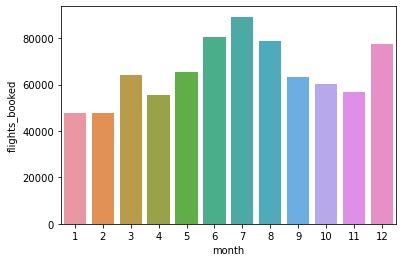

In [52]:
# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[0].set_title("2017'")
sns.barplot(data =df_2017_resultado, x="month", y="flights_booked")

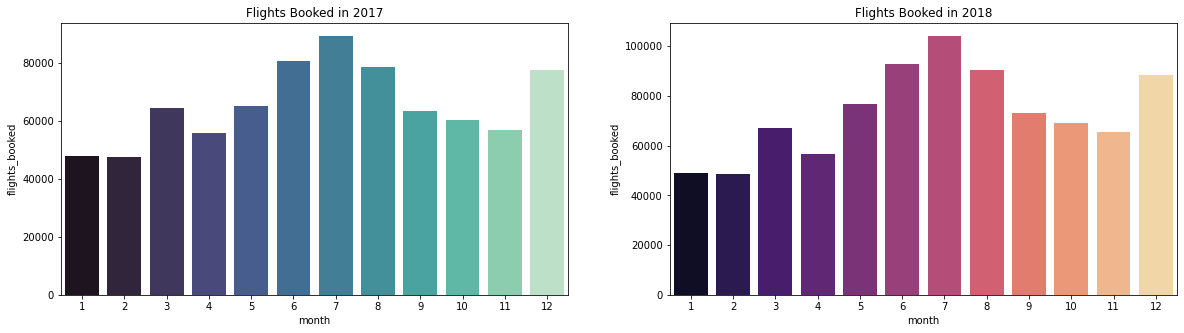

In [67]:
# comenzamos empezando estableciendo nuestra gráfica y indicando el número de filas y columnas que queremos
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# creamos un boxplot, recordemos que en el caso de Seaborn para indicar en el subplot lo queremos tenemos que usar el parámetro 'ax' dentro del método de la función
# fijaos que la única diferencia con los boxplot que hemos creado previamente es que hemos añadido el parametro 'y' 
sns.barplot(x = "month",
            y = "flights_booked", 
            data = df_2017_resultado, 
            ax = axes[0], 
            palette= "mako")
axes[0].set_title('Flights Booked in 2017')

# hacemos lo mismo para el violinplot
sns.barplot(x = "month", 
               y = "flights_booked", 
               data = df_2018_resultado, 
               ax = axes[1], 
               palette = "magma")
axes[1].set_title('Flights Booked in 2018');

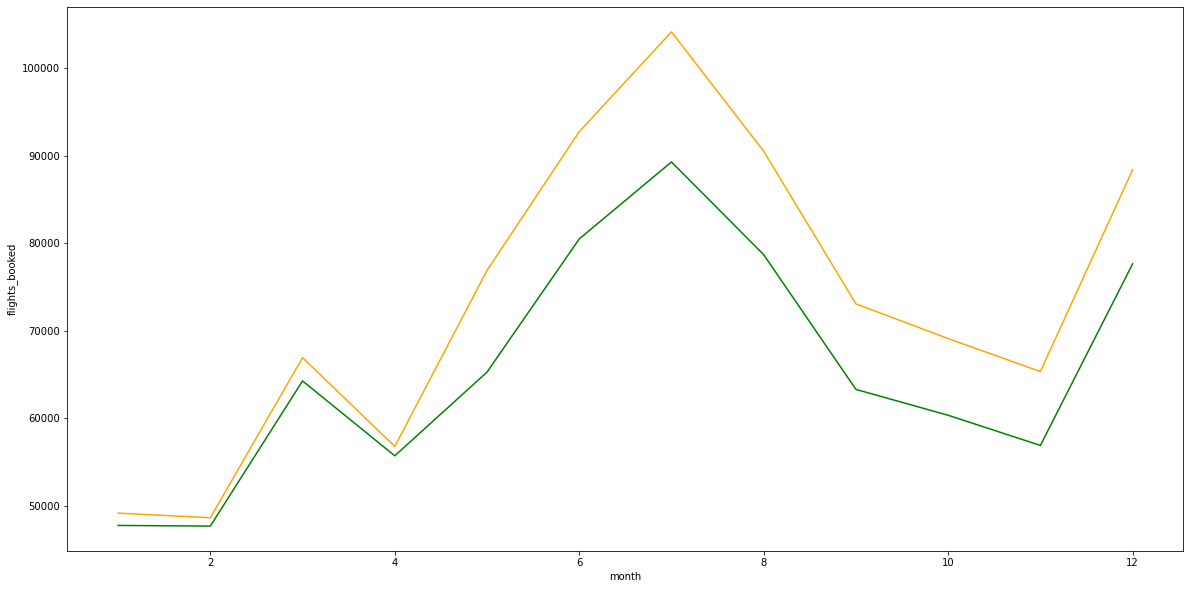

In [62]:

plt.figure(figsize=(20, 10))
sns.lineplot(x=df_2017_resultado["month"], y=df_2017_resultado["flights_booked"], color = "green")
sns.lineplot(x=df_2018_resultado["month"], y=df_2018_resultado["flights_booked"], color = "orange");

los vuelos se distribuyen con la misma tendencia, a partir del 4 mes ademas de continuar con esta tendencia tambien aumentan el numero de vuelos 

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

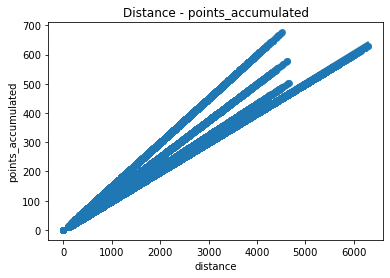

In [78]:
sns.regplot(x = 'distance', 
y = 'points_accumulated', 
data = df)
plt.xlabel('distance')
plt.ylabel('points_accumulated')
plt.title("Distance - points_accumulated");

Coinciden con la linea que traza el grafico. Existe una relación directa.

In [83]:
df.columns

Index(['province', 'city', 'postal_code', 'gender', 'education', 'salary',
       'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')

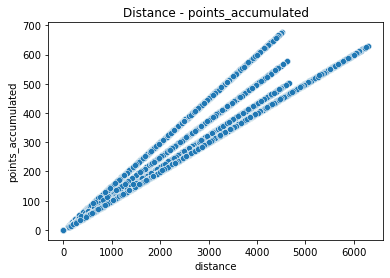

In [82]:

sns.scatterplot(x = 'distance', 
y = 'points_accumulated', 
data = df)
plt.xlabel('distance')
plt.ylabel('points_accumulated')
plt.title("Distance - points_accumulated");

Observamos que a mayor distancia se acumulan mas puntos, dentro de la distancia debe existir un parametro adicional que quizas pueden ser las rutas, el tipo de socio, o el tipo de billete  que influye en la acumulación de puntos. Puede realizarse un estudio posterior.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [154]:
df.columns

Index(['loyalty_number', 'province', 'city', 'postal_code', 'gender',
       'education', 'salary', 'marital_status', 'loyalty_card', 'clv',
       'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month', 'year', 'month',
       'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')

In [161]:
numero =df['loyalty_number'].unique()
print(f"cantidad de valores unicos:  {len(numero)}")

cantidad de valores unicos:  16737


In [165]:
# Filtramos valores únicos de 'loyalty_number' y seleccionar la columna 'province', para ello borramos los duplicados
unique_customers_by_province = df.drop_duplicates(subset=['loyalty_number'])[['loyalty_number', 'province']]
unique_customers_by_province.shape


(16737, 2)

In [178]:
# Hacemos el groupby por 'province' y contar el número de clientes únicos en cada provincia
customers_per_province = unique_customers_by_province.groupby('province').count()
df_customers_per_province = customers_per_province.reset_index()
df_customers_per_province

,province,loyalty_number
0,alberta,969
1,british_columbia,4409
2,manitoba,658
3,new_brunswick,636
4,newfoundland,258
5,nova_scotia,518
6,ontario,5404
7,prince_edward_island,66
8,quebec,3300
9,saskatchewan,409


In [174]:
df_customers_per_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   province        11 non-null     object
 1   loyalty_number  11 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'alberta'),
  Text(1, 0, 'british_columbia'),
  Text(2, 0, 'manitoba'),
  Text(3, 0, 'new_brunswick'),
  Text(4, 0, 'newfoundland'),
  Text(5, 0, 'nova_scotia'),
  Text(6, 0, 'ontario'),
  Text(7, 0, 'prince_edward_island'),
  Text(8, 0, 'quebec'),
  Text(9, 0, 'saskatchewan'),
  Text(10, 0, 'yukon')])

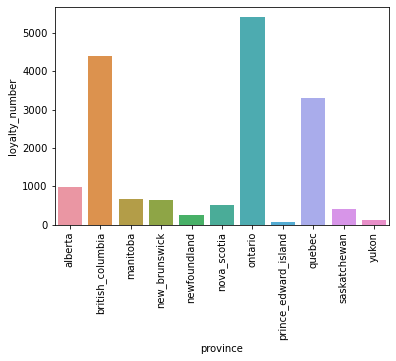

In [187]:
sns.barplot(x='province', y='loyalty_number', data=df_customers_per_province)
plt.xticks(rotation = 90)

Podemos observar que Ontario, British Columbia, Quebed son las provincias que tienen mas clientes, mientras Prince_edward_island y Yukon las que menos.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes? Recordamos que la columna salary tiene nulos.Veamos su distribución


In [189]:
df["salary"].describe()

count    301500.000000
mean      79371.732902
std       34726.433958
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salary, dtype: float64

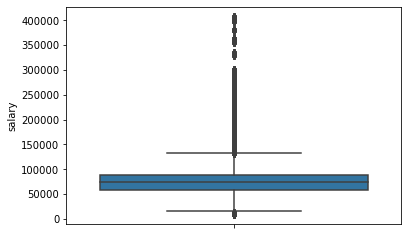

In [190]:
sns.boxplot(y = 'salary',data = df);

La grafica de salarios presenta muchos outlier

In [201]:


# Creamos un nuevo DataFrame con las filas donde 'salary' es nulo 
df_nulos_salary = df[df['salary'].isnull()]

# Muestra las primeras filas del nuevo DataFrame
df_nulos_salary["education"].value_counts()


college    102260
Name: education, dtype: int64

Para el total de nulos la educación corresponde a college y tiene sentido. No haremos imputación de nulos.

In [202]:
df_nulos_salary.head(5)

,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
24,100102,ontario,toronto,m1r_4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN,2017,1,10,4,14,2030.0,203.0,0.0,0.0
25,100102,ontario,toronto,m1r_4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN,2017,2,0,0,0,0.0,0.0,0.0,0.0
26,100102,ontario,toronto,m1r_4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN,2017,4,9,0,9,648.0,64.0,0.0,0.0
27,100102,ontario,toronto,m1r_4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN,2017,5,0,0,0,0.0,0.0,0.0,0.0
28,100102,ontario,toronto,m1r_4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN,2017,6,0,0,0,0.0,0.0,0.0,0.0


In [206]:
df.shape

(403760, 24)

In [205]:
# Filtrar las filas donde 'salary' no es nulo y además 'salary' es de tipo float
df_no_nulos_salary = df[df['salary'].notnull()]

# Mostrar las primeras filas del nuevo DataFrame
df_no_nulos_salary.shape


(301500, 24)

In [ ]:
df_no_nulos_salary

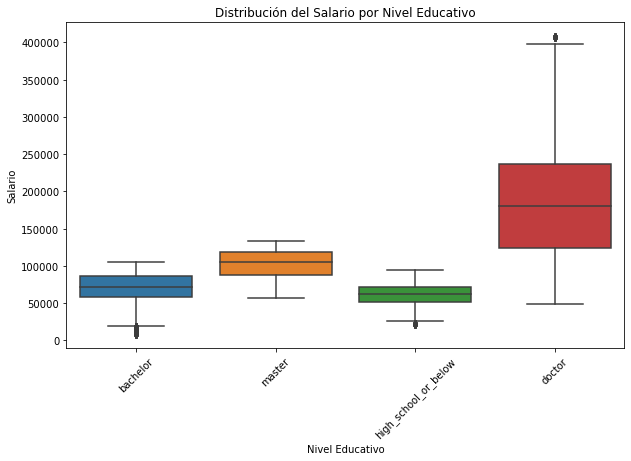

In [211]:


# Creamos un gráfico de boxplot para visualizar la distribución del salario por nivel educativo
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='salary', data=df_no_nulos_salary)
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario')
plt.title('Distribución del Salario por Nivel Educativo')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()




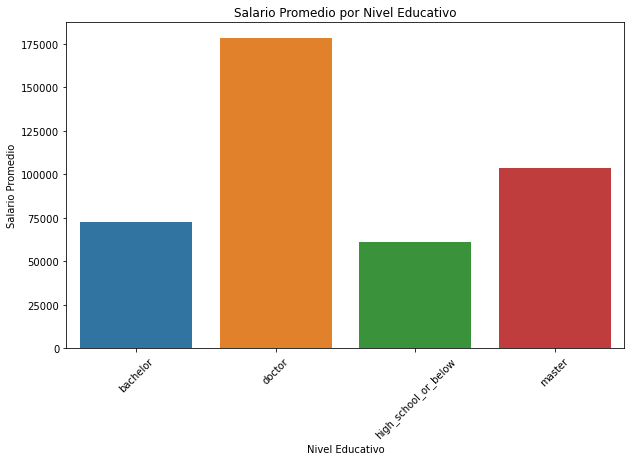

In [209]:
# Calcular el salario promedio por nivel educativo
salario_promedio_por_educacion = df_no_nulos_salary.groupby('education')['salary'].mean().reset_index()

# Crear un gráfico de barras para comparar el salario promedio entre los diferentes niveles educativos
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='salary', data=salario_promedio_por_educacion)
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.title('Salario Promedio por Nivel Educativo')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

Observams los salarios mas altos en los niveles educativos de doctor y master.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género

In [ ]:
sns.barplot(data =df_2017_resultado, x="month", y="flights_booked")

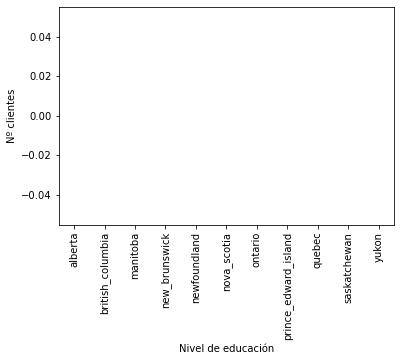

In [186]:
# volvemos a construir la gráfica usando un 'sns.countplot()'
# en este caso hemos añadido el parámetro 'order' para ordenar el nombre de las etiquetas y que aparezcan las barras de mayor cantidad a menor. 
sns.countplot(x = "loyalty_number", 
              data = df_customers_per_province,
              color = "c", 
              order = ['alberta',
    'british_columbia',
    'manitoba',
    'new_brunswick',
    'newfoundland',
    'nova_scotia',
    'ontario',
    'prince_edward_island',
    'quebec',
    'saskatchewan',
    'yukon'])

# giramos las etiquetas del eje "x", en este caso a 90º. En este caso solo vamos a usar el parámetro 'rotation', 
# más adelante veremos mas ejemplos para usar los otros parámetros. 
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
plt.xlabel("Nivel de educación")
plt.ylabel("Nº clientes");

In [ ]:
# Hacemos el groupby por 'province' y contar el número de clientes únicos en cada provincia
customers_per_province = unique_customers_by_province.groupby('province').count()

# Renombrar la columna resultante como 'customer_count'
customers_per_province.rename(columns={'loyalty_number': 'customer_count'}, inplace=True)

# Ordenar los resultados por cantidad de clientes
customers_per_province.sort_values(by='customer_count', ascending=False, inplace=True)

# Mostrar la distribución de clientes por provincia o estado
customers_per_province

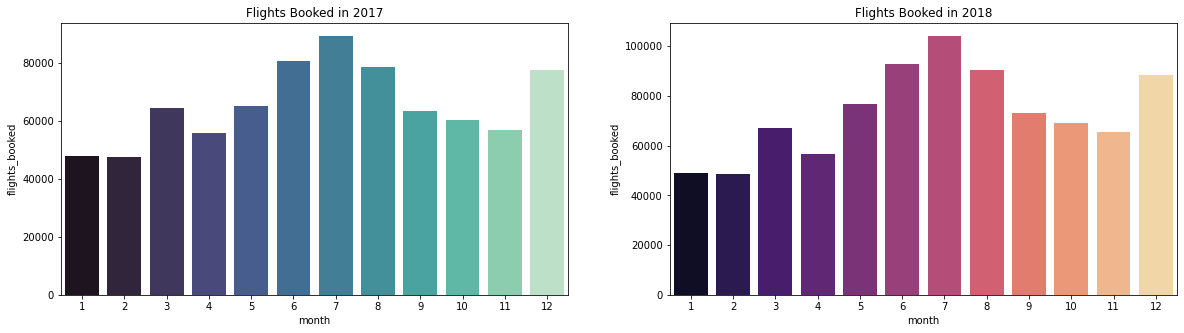

In [66]:
# comenzamos empezando estableciendo nuestra gráfica y indicando el número de filas y columnas que queremos
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# creamos un boxplot, recordemos que en el caso de Seaborn para indicar en el subplot lo queremos tenemos que usar el parámetro 'ax' dentro del método de la función
# fijaos que la única diferencia con los boxplot que hemos creado previamente es que hemos añadido el parametro 'y' 
sns.barplot(x = "month",
            y = "flights_booked", 
            data = df_2017_resultado, 
            ax = axes[0], 
            palette= "mako")
axes[0].set_title('Flights Booked in 2017')

# hacemos lo mismo para el violinplot
sns.barplot(x = "month", 
               y = "flights_booked", 
               data = df_2018_resultado, 
               ax = axes[1], 
               palette = "magma")
axes[1].set_title('Flights Booked in 2018');

In [ ]:
sns.histplot(x = 'month', data = df)
plt.xlabel('Tasa natalidad')
plt.title('Distribución natalidad');

In [ ]:
sns.histplot(x = 'fertility_rate', data = df)
plt.xlabel('Tasa natalidad')
plt.title('Distribución natalidad');

In [31]:
# una vez que tengamos nuestro DataFrame preparado con todas las columnas que queremos vamos a crear una función que no haga una exploración inicial del conjunto de datos
def exploracion_dataframe(dataframe, columna_control):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas, agrupadas por la columna de control.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que se va a explorar.
    - columna_control (str): El nombre de la columna que se utilizará como control para dividir el DataFrame.

    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    
    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    
    # como estamos en un problema de A/B testing y lo que realmente nos importa es comparar entre el grupo de control y el de test, los principales estadísticos los vamos a sacar de cada una de las categorías
    
    for categoria in dataframe[columna_control].unique():
        
        dataframe_filtrado = dataframe[dataframe[columna_control] == categoria]
    
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe(include = "O").T)
        
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe().T)

In [49]:
df['loyalty_card'].unique()

array(['Aurora', 'Nova', 'Star'], dtype=object)

In [40]:
exploracion_dataframe(df,"education")

Los duplicados que tenemos en el conjunto de datos son: 1864

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
salary,25.312112
cancellation_year,87.657535
cancellation_month,87.657535



 ..................... 

Los tipos de las columnas son:


,tipo_dato
country,object
province,object
city,object
postal_code,object
gender,object
education,object
salary,float64
marital_status,object
loyalty_card,object
clv,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene las siguientes valore únicos:


,country
Canada,405624


La columna PROVINCE tiene las siguientes valore únicos:


,province
Ontario,130896
British Columbia,106848
Quebec,79968
Alberta,23400
Manitoba,15984


La columna CITY tiene las siguientes valore únicos:


,city
Toronto,81096
Vancouver,62520
Montreal,49920
Winnipeg,15984
Whistler,14040


La columna POSTAL_CODE tiene las siguientes valore únicos:


,postal_code
V6E 3D9,21984
V5R 1W3,16608
V6T 1Y8,14040
V6E 3Z3,13200
M2M 7K8,12936


La columna GENDER tiene las siguientes valore únicos:


,gender
Female,203640
Male,201984


La columna EDUCATION tiene las siguientes valore únicos:


,education
Bachelor,253752
College,102672
High School or Below,19008
Doctor,17856
Master,12336


La columna MARITAL_STATUS tiene las siguientes valore únicos:


,marital_status
Married,235800
Single,108648
Divorced,61176


La columna LOYALTY_CARD tiene las siguientes valore únicos:


,loyalty_card
Star,184224
Nova,137568
Aurora,83832


La columna ENROLLMENT_TYPE tiene las siguientes valore únicos:


,enrollment_type
Standard,382200
2018 Promotion,23424



 ..................... 

Los principales estadísticos de las columnas categóricas para el BACHELOR son: 


,count,unique,top,freq
country,253752,1,Canada,253752
province,253752,11,Ontario,81192
city,253752,29,Toronto,51120
postal_code,253752,54,V6E 3D9,13944
gender,253752,2,Female,127872
education,253752,1,Bachelor,253752
marital_status,253752,3,Married,172224
loyalty_card,253752,3,Star,108336
enrollment_type,253752,2,Standard,238488



 ..................... 

Los principales estadísticos de las columnas numéricas para el BACHELOR son: 


,count,mean,std,min,25%,50%,75%,max
salary,253752.0,72476.211860,17205.712889,-58486.00,58711.00,71971.00,85848.00,105563.00
clv,253752.0,8215.816801,7061.053007,2255.31,4150.84,5867.13,9082.83,83325.38
enrollment_year,253752.0,2015.263407,1.988988,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,253752.0,6.649295,3.381761,1.00,4.00,7.00,10.00,12.00
cancellation_year,31224.0,2016.485780,1.386513,2013.00,2016.00,2017.00,2018.00,2018.00
cancellation_month,31224.0,7.058417,3.456111,1.00,4.00,7.00,10.00,12.00
year,253752.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
month,253752.0,6.500000,3.452059,1.00,3.75,6.50,9.25,12.00
flights_booked,253752.0,4.091093,5.216995,0.00,0.00,1.00,8.00,21.00
flights_with_companions,253752.0,1.025899,2.072316,0.00,0.00,0.00,1.00,11.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el COLLEGE son: 


,count,unique,top,freq
country,102672,1,Canada,102672
province,102672,11,Ontario,33624
city,102672,29,Toronto,20280
postal_code,102672,55,V6E 3D9,5736
gender,102672,2,Male,52104
education,102672,1,College,102672
marital_status,102672,3,Single,58776
loyalty_card,102672,3,Star,51072
enrollment_type,102672,2,Standard,96936



 ..................... 

Los principales estadísticos de las columnas numéricas para el COLLEGE son: 


,count,mean,std,min,25%,50%,75%,max
salary,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clv,102672.0,7575.448806,6546.384983,1898.01,3744.58,5568.95,8489.84,74228.52
enrollment_year,102672.0,2015.270220,1.962468,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,102672.0,6.666199,3.434345,1.00,4.00,7.00,10.00,12.00
cancellation_year,12672.0,2016.573864,1.367367,2013.00,2016.00,2017.00,2018.00,2018.00
cancellation_month,12672.0,6.880682,3.336536,1.00,4.00,7.00,10.00,12.00
year,102672.0,2017.500000,0.500002,2017.00,2017.00,2017.50,2018.00,2018.00
month,102672.0,6.500000,3.452069,1.00,3.75,6.50,9.25,12.00
flights_booked,102672.0,4.153012,5.242136,0.00,0.00,1.00,8.00,21.00
flights_with_companions,102672.0,1.044374,2.090169,0.00,0.00,0.00,1.00,11.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el MASTER son: 


,count,unique,top,freq
country,12336,1,Canada,12336
province,12336,11,Ontario,4128
city,12336,29,Toronto,2496
postal_code,12336,53,V6E 3D9,672
gender,12336,2,Female,6456
education,12336,1,Master,12336
marital_status,12336,3,Married,5040
loyalty_card,12336,3,Star,6696
enrollment_type,12336,2,Standard,11880



 ..................... 

Los principales estadísticos de las columnas numéricas para el MASTER son: 


,count,mean,std,min,25%,50%,75%,max
salary,12336.0,103767.494163,17514.343573,56414.00,88120.00,105487.00,118530.00,133080.00
clv,12336.0,7524.240117,5924.737304,2174.11,3600.93,5205.88,10083.49,30591.61
enrollment_year,12336.0,2015.233463,1.943833,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,12336.0,6.826848,3.389750,1.00,4.00,7.00,10.00,12.00
cancellation_year,1584.0,2016.681818,1.383879,2013.00,2016.00,2017.00,2018.00,2018.00
cancellation_month,1584.0,6.348485,3.625525,1.00,3.00,7.00,10.00,12.00
year,12336.0,2017.500000,0.500020,2017.00,2017.00,2017.50,2018.00,2018.00
month,12336.0,6.500000,3.452192,1.00,3.75,6.50,9.25,12.00
flights_booked,12336.0,4.184014,5.210294,0.00,0.00,1.00,8.00,21.00
flights_with_companions,12336.0,1.049043,2.078346,0.00,0.00,0.00,1.00,11.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el HIGH SCHOOL OR BELOW son: 


,count,unique,top,freq
country,19008,1,Canada,19008
province,19008,11,Ontario,6312
city,19008,29,Toronto,3888
postal_code,19008,54,V5R 1W3,912
gender,19008,2,Female,9720
education,19008,1,High School or Below,19008
marital_status,19008,3,Married,12552
loyalty_card,19008,3,Star,9672
enrollment_type,19008,2,Standard,17808



 ..................... 

Los principales estadísticos de las columnas numéricas para el HIGH SCHOOL OR BELOW son: 


,count,mean,std,min,25%,50%,75%,max
salary,19008.0,60986.544192,12723.916043,-49830.00,52044.75,61806.00,71344.00,93875.0
clv,19008.0,7722.940328,6657.946709,2272.34,3707.28,5269.28,8991.98,43290.5
enrollment_year,19008.0,2015.193182,1.984666,2012.00,2013.00,2015.00,2017.00,2018.0
enrollment_month,19008.0,6.609848,3.457341,1.00,4.00,7.00,10.00,12.0
cancellation_year,2256.0,2016.276596,1.394860,2013.00,2015.00,2016.50,2017.00,2018.0
cancellation_month,2256.0,6.574468,3.738188,1.00,3.00,7.00,10.00,12.0
year,19008.0,2017.500000,0.500013,2017.00,2017.00,2017.50,2018.00,2018.0
month,19008.0,6.500000,3.452143,1.00,3.75,6.50,9.25,12.0
flights_booked,19008.0,4.155777,5.234551,0.00,0.00,1.00,8.00,21.0
flights_with_companions,19008.0,1.043718,2.087937,0.00,0.00,0.00,1.00,11.0



 ..................... 

Los principales estadísticos de las columnas categóricas para el DOCTOR son: 


,count,unique,top,freq
country,17856,1,Canada,17856
province,17856,11,Ontario,5640
city,17856,29,Toronto,3312
postal_code,17856,55,V6E 3Z3,888
gender,17856,2,Female,9024
education,17856,1,Doctor,17856
marital_status,17856,3,Married,11256
loyalty_card,17856,3,Star,8448
enrollment_type,17856,2,Standard,17088



 ..................... 

Los principales estadísticos de las columnas numéricas para el DOCTOR son: 


,count,mean,std,min,25%,50%,75%,max
salary,17856.0,178335.439516,70307.642502,48109.00,124343.7500,180440.00,235069.250,407228.00
clv,17856.0,7815.538978,6466.157567,2119.89,4056.4125,5619.19,8580.735,58207.13
enrollment_year,17856.0,2015.072581,1.949028,2012.00,2013.0000,2015.00,2017.000,2018.00
enrollment_month,17856.0,6.896505,3.389085,1.00,4.0000,7.00,10.000,12.00
cancellation_year,2328.0,2016.371134,1.394837,2013.00,2015.0000,2016.00,2018.000,2018.00
cancellation_month,2328.0,7.000000,3.446940,1.00,4.0000,7.00,10.000,12.00
year,17856.0,2017.500000,0.500014,2017.00,2017.0000,2017.50,2018.000,2018.00
month,17856.0,6.500000,3.452149,1.00,3.7500,6.50,9.250,12.00
flights_booked,17856.0,4.146281,5.250093,0.00,0.0000,1.00,8.000,21.00
flights_with_companions,17856.0,1.018873,2.051570,0.00,0.0000,0.00,1.000,11.00


In [ ]:
# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Gráfico 1: Tasa de Clicks (CTR)
sns.barplot(x="campaign_name", y="CTR", data=df, ax=axes[0])
axes[0].set_title("Tasa de Clicks")

# Gráfico 2: Tasa de Conversión (CR)
sns.barplot(x="campaign_name", y="CR", data=df, ax=axes[1])
axes[1].set_title("Tasa de Conversión")

# Gráfico 3: Costo por Adquisición (CPA)
sns.barplot(x="campaign_name", y="CPA", data=df, ax=axes[2])
axes[2].set_title("Coste por Adquisición");

In [51]:
# recordemos cuántos nulos tenemos y en que porcentaje están para decidir correctamente que método de imputación usamos:
# solo tenemos nulos en variables numéricas, por lo que solo lo haremos para este tipo de variables
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['salary', 'cancellation_year', 'cancellation_month'], dtype='object')


In [ ]:
# como en todos los casos tenemos menos de un 5% de nulos, optaremos por reemplazar por la media o la mediana, para elegir la mejor métrica hagamos un 'decribe()' para decidir que estadístico es mejor
df[nulos_esta_num].describe().T.loc[:, ["mean", "50%"]]

Algunos valores difieren entre la media y la mediana, como es el caso de `of_impressions`, `reach`, `of_purchase`, `CTR`, `CR`, `CPA`. En estos casos, lo correcto sería reemplazar por la mediana. En el resto de las columnas, podríamos reeamplazar por la media o la mediana. Para simplificar el problema, reemplazaremos por la mediana  en todas las columnas. 

In [ ]:
# reemplazamos los valores nulos
for columna in nulos_esta_num:
    mediana = df[columna].median()
    df[columna] = df[columna].fillna(mediana)
    
# comprobamos que ya no queden valores nulos
df.isnull().sum()

Realizamos un EDA para cada uno de los conjuntos de datos: